In [8]:
import pandas as pd
import numpy as np

In [9]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [10]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

In [15]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
x=df
y = cancer_data['target']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [58]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000)
model = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
clf.score(X_test_scaled, y_test)

0.9736842105263158

In [61]:
model.score(X_test, y_test)

0.9649122807017544

## ROC/AUC Curve

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
y_pred = clf.predict(X_test_scaled)

In [65]:
y_pred_prob = clf.predict_proba(X_test_scaled)
y_pred_prob

array([[1.13590250e-01, 8.86409750e-01],
       [9.99990991e-01, 9.00936206e-06],
       [9.96920905e-01, 3.07909541e-03],
       [5.10134225e-04, 9.99489866e-01],
       [6.06389713e-05, 9.99939361e-01],
       [1.00000000e+00, 9.48087773e-11],
       [9.99999998e-01, 1.53672648e-09],
       [9.65096937e-01, 3.49030633e-02],
       [3.79342140e-01, 6.20657860e-01],
       [7.59402734e-04, 9.99240597e-01],
       [4.98717826e-02, 9.50128217e-01],
       [9.87592879e-01, 1.24071210e-02],
       [6.07381873e-03, 9.93926181e-01],
       [8.56069117e-01, 1.43930883e-01],
       [1.62175599e-03, 9.98378244e-01],
       [9.99259818e-01, 7.40182295e-04],
       [1.85245908e-03, 9.98147541e-01],
       [1.11662359e-05, 9.99988834e-01],
       [8.18375684e-07, 9.99999182e-01],
       [9.99998883e-01, 1.11701472e-06],
       [8.41633901e-02, 9.15836610e-01],
       [9.74778299e-03, 9.90252217e-01],
       [9.99999996e-01, 4.33732393e-09],
       [7.89186669e-05, 9.99921081e-01],
       [1.138743

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [73]:
y_tpr = y_pred_prob[:,1]

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_tpr)

In [80]:
roc_auc_score(y_test, y_pred)

0.969701932525385

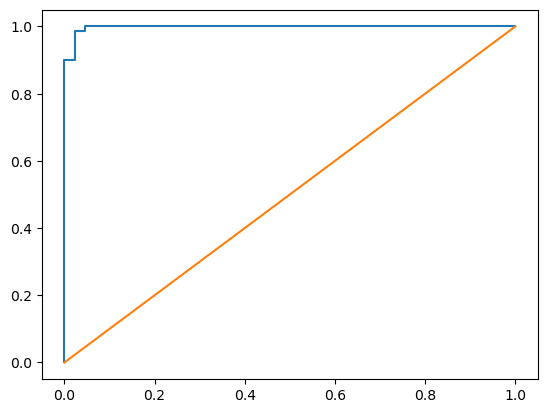

In [83]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [88]:
conf_matr = confusion_matrix(y_test, y_pred)

In [87]:
import seaborn as sns

<Axes: >

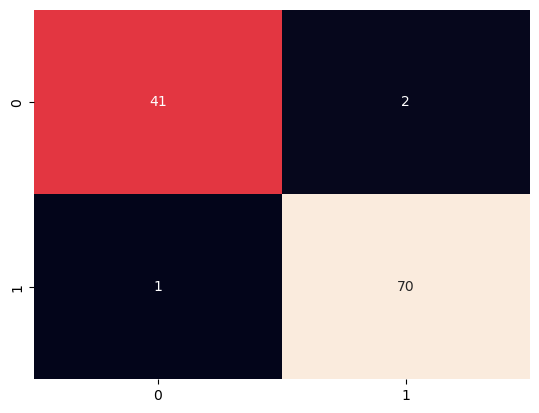

In [90]:
sns.heatmap(conf_matr, annot=True, cbar=False)

/Users/nareshdhami/Desktop/MachineLearning/env/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


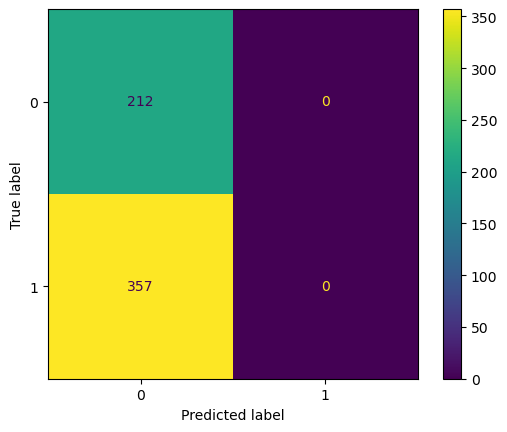

In [92]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

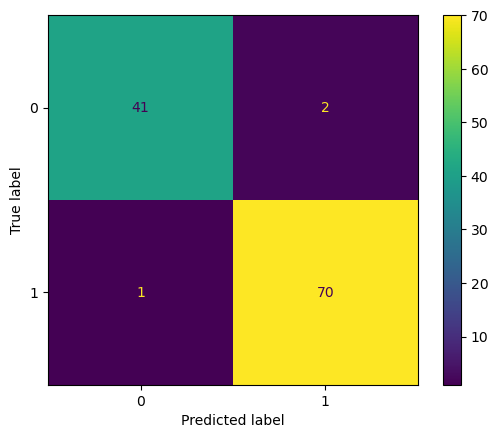

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)